In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.datasets import load_breast_cancer,load_iris,fetch_california_housing
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models


# 1.   ***Binary Classification***


In [111]:
data = load_breast_cancer()
X = data.data
y = data.target

In [112]:
scaler = StandardScaler()

In [113]:
X_scaler = scaler.fit_transform(X)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.33, random_state=42)

In [115]:
model = models.Sequential([
    layers.Dense(16,activation='relu',input_shape=(X_train.shape[1],)),
    layers.Dense(8,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=["accuracy"])

In [117]:
history = model.fit(X_train,y_train,epochs=100,batch_size=8,verbose=1)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6770 - loss: 0.7018   
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8722 - loss: 0.4304 
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9243 - loss: 0.3475 
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9587 - loss: 0.2495 
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9636 - loss: 0.2124 
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9425 - loss: 0.1883 
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9642 - loss: 0.1593
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9658 - loss: 0.1402 
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9718 - loss: 0.1431 
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9598 - loss: 0.1337 
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9786 - loss: 0.1006 
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [118]:
loss,accuracy = model.evaluate(X_test,y_test,verbose=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9797 - loss: 0.0712  


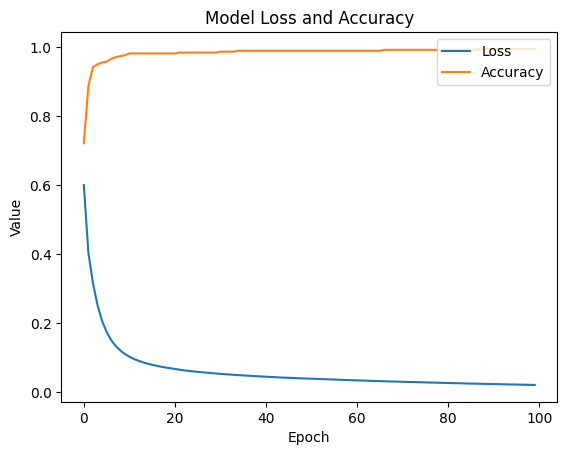

In [119]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss and Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()


# 2.   ***Regression***


In [120]:
data = fetch_california_housing()
X = data.data
y = data.target

In [121]:
X_scaler = scaler.fit_transform(X)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.33, random_state=42)

In [123]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [124]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [125]:
history = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_split=0.2,verbose=1)

Epoch 1/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5210 - mae: 0.8317 - val_loss: 0.4679 - val_mae: 0.4777
Epoch 2/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4079 - mae: 0.4514 - val_loss: 0.4250 - val_mae: 0.4565
Epoch 3/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3667 - mae: 0.4314 - val_loss: 0.4059 - val_mae: 0.4424
Epoch 4/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3704 - mae: 0.4288 - val_loss: 0.3964 - val_mae: 0.4442
Epoch 5/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3497 - mae: 0.4217 - val_loss: 0.3847 - val_mae: 0.4278
Epoch 6/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3434 - mae: 0.4122 - val_loss: 0.3719 - val_mae: 0.4335
Epoch 7/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3270 - mae: 0.4049 - val_loss: 0.3710 - val_mae: 0.4269
Epoch 8/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3321 - mae: 0.4061 - val_loss: 0.3577 - val_mae: 0.4195
Epoch 9/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/

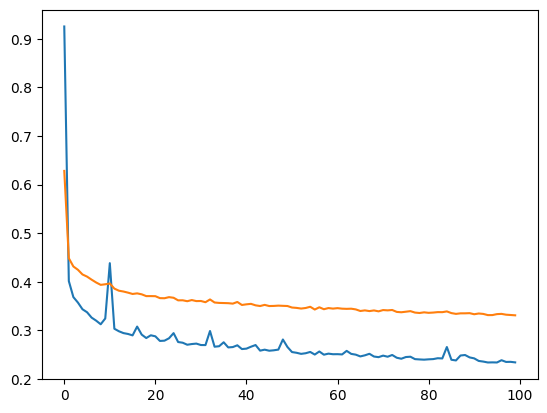

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])

# 3. ***Multi Class-Classification***

In [127]:
data = load_iris()
X = data.data
y = data.target

In [128]:
X_scaler = scaler.fit_transform(X)

In [129]:
y_encoded = to_categorical(y)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y_encoded, test_size=0.33, random_state=42)

In [135]:
model = models.Sequential([
    layers.Dense(16,activation='relu',input_dim=X_train.shape[1]),
    layers.Dense(16,activation='relu'),
    layers.Dense(3,activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [136]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [137]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3684 - loss: 1.0701 - val_accuracy: 0.6500 - val_loss: 0.9835
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5146 - loss: 1.0147 - val_accuracy: 0.7500 - val_loss: 0.9389
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6051 - loss: 0.9605 - val_accuracy: 0.6500 - val_loss: 0.8973
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7322 - loss: 0.8879 - val_accuracy: 0.7000 - val_loss: 0.8554
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7485 - loss: 0.8810 - val_accuracy: 0.7000 - val_loss: 0.8111
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7784 - loss: 0.8035 - val_accuracy: 0.7000 - val_loss: 0.7689
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8072 - loss: 0.7459 - val_accuracy: 0.7000 - val_loss: 0.7254
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7434 - loss: 0.7181 - val_accuracy: 0.7500 - val_loss

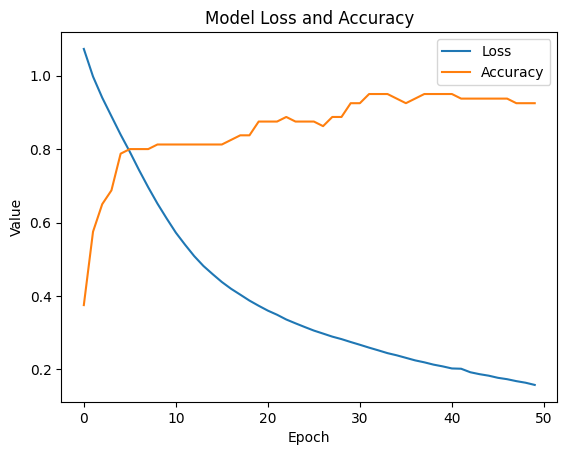

In [138]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Model Loss and Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()